## Analyzing patients' data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
loadPath = "../data/"
savePath = "../results/"

### Frequency of visits per patient

In [3]:
df = pd.read_csv(loadPath + 'MRIT1_UDS_matched_final.csv')

# Count the occurrences of each patient (NACCID) in the dataset
naccid_counts = df['NACCID'].value_counts()

# Count how many patients have 2 scans, 3 scans, and so on
scan_frequency = naccid_counts.value_counts().sort_index()

# Printing the results
print(scan_frequency)
print('Total number of patients with more than one MRIT1 scan =', np.sum(scan_frequency.values))

count
2    738
3    223
4     44
5      5
6      5
7      3
8      3
9      1
Name: count, dtype: int64
Total number of patients with more than one MRIT1 scan = 1022


### Visualizing data

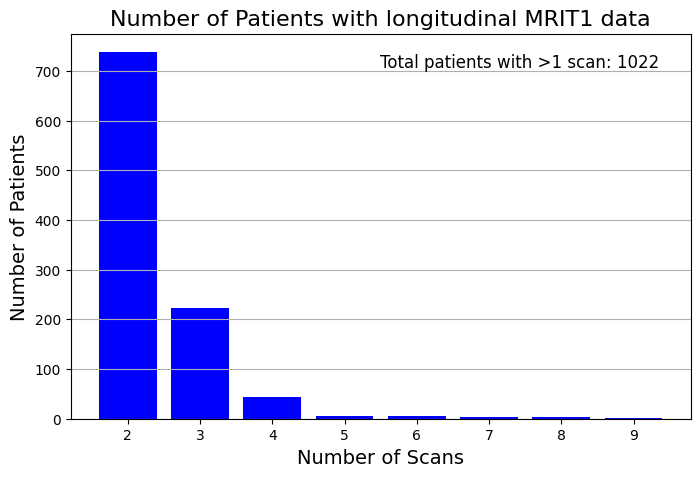

In [4]:
plt.figure(figsize=(8, 5))
plt.bar(scan_frequency.index, scan_frequency.values, color='blue')
plt.title('Number of Patients with longitudinal MRIT1 data', fontsize=16)
plt.xlabel('Number of Scans', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.xticks(scan_frequency.index)                                          
plt.grid(axis='y')

textstr = f"Total patients with >1 scan: {np.sum(scan_frequency.values)}"

plt.gca().text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='right'
               )
               #bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=0.5)

#plt.savefig(savePath + 'MRIT1_UDS_matched_patients_number_histogram.png')
plt.show()

## Analyzing data by cognitive status
I have NACCIDs stored by the patients' cognitive status <br>
(1=normal cognition, 2=impaired-not MCI, 3=mild cognitive impairment, 4=demented)

Loading the .txt file. Each row represents one possible cognition status (constant or change).

In [5]:
# Open the .txt file and read lines into arrays
with open(loadPath + 'naccids_by_uds_categories_matched_final.txt', 'r') as f:
    lines = f.readlines()

In [6]:
constant_1_array = [x for x in lines[0].strip().split(',') if x]
constant_2_array = [x for x in lines[1].strip().split(',') if x]
constant_3_array = [x for x in lines[2].strip().split(',') if x]
constant_4_array = [x for x in lines[3].strip().split(',') if x]
change_1_2_array = [x for x in lines[4].strip().split(',') if x]
change_1_3_array = [x for x in lines[5].strip().split(',') if x]
change_1_4_array = [x for x in lines[6].strip().split(',') if x]
change_1_2_3_array = [x for x in lines[7].strip().split(',') if x]
change_1_2_4_array = [x for x in lines[8].strip().split(',') if x]
change_1_3_4_array = [x for x in lines[9].strip().split(',') if x]
change_1_2_3_4_array = [x for x in lines[10].strip().split(',') if x]
change_2_3_array = [x for x in lines[11].strip().split(',') if x]
change_2_4_array = [x for x in lines[12].strip().split(',') if x]
change_2_3_4_array = [x for x in lines[13].strip().split(',') if x]
change_3_4_array = [x for x in lines[14].strip().split(',') if x]

In [10]:
print(constant_2_array)

['NACC052272', 'NACC185770']


Sanity check: checking the total count of all patients to see if I covered all of them.

In [7]:
total_count = (
    len(constant_1_array) + len(constant_2_array) + len(constant_3_array) + len(constant_4_array) +
    len(change_1_2_array) + len(change_1_3_array) + len(change_1_4_array) +
    len(change_1_2_3_array) + len(change_1_2_4_array) + len(change_1_3_4_array) +
    len(change_1_2_3_4_array) + len(change_2_3_array) + len(change_2_4_array) +
    len(change_2_3_4_array) + len(change_3_4_array)
)

print(f"Total number of NACCIDs across all categories: {total_count}")


Total number of NACCIDs across all categories: 1022


In [8]:
print(len(constant_1_array))

648


Visualizing by UDSD.

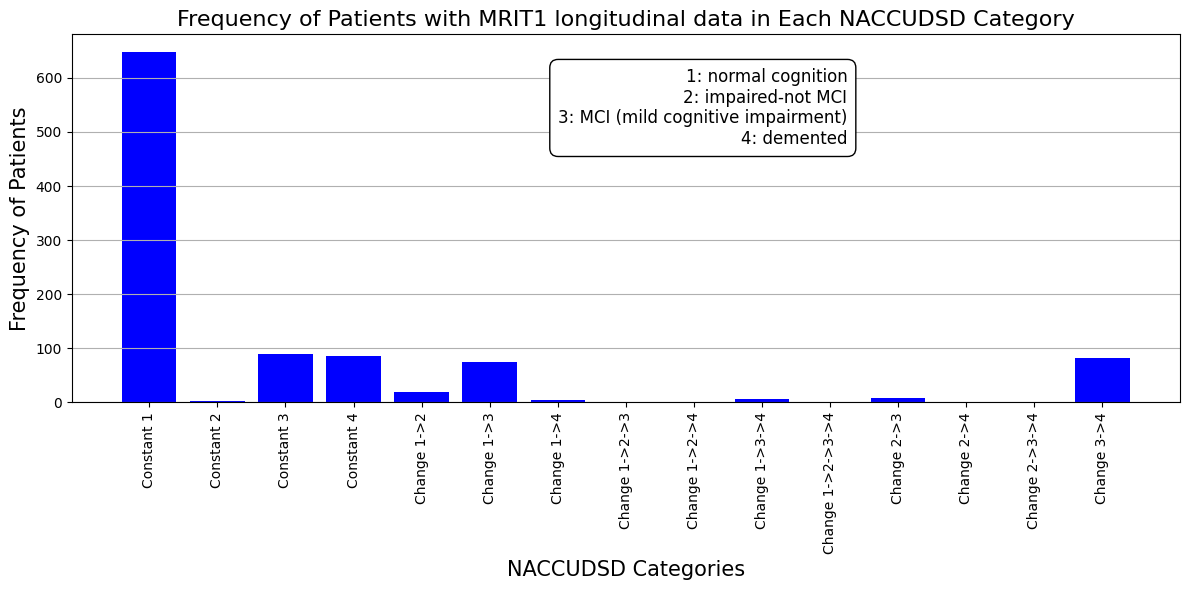

In [9]:
category_lengths = {
    "Constant 1": len(constant_1_array),
    "Constant 2": len(constant_2_array),
    "Constant 3": len(constant_3_array),
    "Constant 4": len(constant_4_array),
    "Change 1->2": len(change_1_2_array),
    "Change 1->3": len(change_1_3_array),
    "Change 1->4": len(change_1_4_array),
    "Change 1->2->3": len(change_1_2_3_array),
    "Change 1->2->4": len(change_1_2_4_array),
    "Change 1->3->4": len(change_1_3_4_array),
    "Change 1->2->3->4": len(change_1_2_3_4_array),
    "Change 2->3": len(change_2_3_array),
    "Change 2->4": len(change_2_4_array),
    "Change 2->3->4": len(change_2_3_4_array),
    "Change 3->4": len(change_3_4_array)
}

# Prepare data for histogram
labels = list(category_lengths.keys())
values = list(category_lengths.values())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='blue')
plt.xlabel('NACCUDSD Categories', fontsize=15)
plt.ylabel('Frequency of Patients', fontsize=15)
plt.title('Frequency of Patients with MRIT1 longitudinal data in Each NACCUDSD Category', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')

textstr = (
    "1: normal cognition\n"
    "2: impaired-not MCI\n"
    "3: MCI (mild cognitive impairment)\n"
    "4: demented"
)

plt.gca().text(0.7, 0.8, textstr, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='center', horizontalalignment='right',
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

#plt.savefig(savePath + 'MRIT1_patients_number_by_udsd_histogram_matched_final.png')
plt.show()

## Plotting longitudinal data
I want to visualize how many MRIT1 scans each patient has and what the time gap between each scan is. 

In [27]:
loadPath = '../data/'

# Load the CSV file
df = pd.read_csv(loadPath + 'MRIT1_UDS_matched_final.csv')

In [28]:
patients = df['NACCID'].unique()

number_of_scans = len(df['NACCID'])

I over complicated when writing this code. What it does is creates an array that stores subarray. Each unique patients get its own subarray, which containts time intervals from the first MRIT1 scan.

In [31]:
from dateutil import parser

differences = []
sum = 0                                                      # sum to store indexing of the patients (borders for what dates to read)

for i in range(0, len(patients)):                            # one subarray for each unique NACCID (patient)

    naccid = df['NACCID'].unique()[i]                        # unique patients

    num = naccid_counts.loc['{}'.format(naccid)]             # number of MRIT1 scans


    months = np.array(df['MRIMO'][sum : sum + num])
    day = np.array(df['MRIDY'][sum : sum + num])
    years = np.array(df['MRIYR'][sum : sum + num])


    diffs = []


    date1 = np.zeros(num, dtype=object)


    for k in range(0, num):
        
        date1[k] = ('{}-{}-{}'.format(years[k], months[k], day[k]))
        
        date1[k] = parser.parse(date1[k])

        
    for l in range(0, len(date1), 1):
            
        d = np.abs(date1[l] - date1[0])
        

        diffs.append(d.days)

    sum += num

    differences.append(diffs)

Some sanity checks.

In [33]:
print(len(differences))
print(differences)
print(differences[0])

1022
[[0, 1019], [0, 629], [0, 281], [0, 400], [0, 413], [0, 339, 758], [0, 505], [0, 440], [0, 495], [0, 745], [0, 525], [0, 481], [0, 742], [0, 644], [0, 531], [0, 360], [0, 329], [0, 331], [0, 495], [0, 385], [0, 482, 1041, 3275], [0, 361, 1006, 2471], [0, 550, 1144, 2545], [0, 524, 1172, 2311], [0, 792], [0, 322, 687], [0, 763], [0, 899], [0, 580, 1751, 2141], [0, 351, 1484, 1848, 2225, 3316, 3667], [0, 448], [0, 1088, 1558, 1885, 2222, 2614, 3291, 3738], [0, 747, 1331, 1700], [0, 763, 1491], [0, 581, 1141], [0, 834], [0, 404, 1002, 1337, 1743, 2406], [0, 430], [0, 912, 2485], [0, 182, 566, 931], [0, 1050], [0, 863, 1512, 1828, 2750, 3087], [0, 1321], [0, 1032, 1738], [0, 733, 1105], [0, 427, 2430], [0, 595], [0, 374, 1130, 1473, 1851, 2461, 3315, 3643, 4035], [0, 3714], [0, 1286, 1658, 2360], [0, 351], [0, 699], [0, 911, 1608], [0, 2052], [0, 542, 900, 2269], [0, 387], [0, 239, 658], [0, 518], [0, 329], [0, 511, 1079], [0, 1644], [0, 862], [0, 643, 1177], [0, 377], [0, 462, 1093, 

Transforming difference in days to months.

In [34]:
# this is only approximation, since we divide by average number of days in a month, but it works good enough for visualization
for p in differences:

    for e in range(0, len(p)):

        p[e] = p[e] / 30.437                      

print(differences)

[[0.0, 33.47898938791602], [0.0, 20.665637217859842], [0.0, 9.232184512271248], [0.0, 13.141899661596083], [0.0, 13.569011400597956], [0.0, 11.137759963202681, 24.90389985872458], [0.0, 16.591648322765057], [0.0, 14.456089627755691], [0.0, 16.263100831225152], [0.0, 24.476788119722706], [0.0, 17.248743305844858], [0.0, 15.80313434306929], [0.0, 24.378223872260733], [0.0, 21.158458455169693], [0.0, 17.4458718007688], [0.0, 11.827709695436475], [0.0, 10.809212471662779], [0.0, 10.874921969970758], [0.0, 16.263100831225152], [0.0, 12.64907842428623], [0.0, 15.835989092223281, 34.201793869303806, 107.59930347931792], [0.0, 11.860564444590466, 33.05187764891415, 81.1840851595098], [0.0, 18.070112034694613, 37.5858330321648, 83.61533659690508], [0.0, 17.215888556690867, 38.50576600847652, 75.92732529487137], [0.0, 26.020961329960244], [0.0, 10.579229227584847, 22.571212668791272], [0.0, 25.06817360449453], [0.0, 29.536419489437197], [0.0, 19.05575450931432, 57.528665768636856, 70.34201793869

In [35]:
print(differences[0])

[0.0, 33.47898938791602]


In [36]:
patients = df['NACCID'].unique()

print(patients[0])


dic_unsorted = {}

for i in range(0, len(patients)):    
    
    dic_unsorted['{}'.format(patients[i])] = differences[i] 


print(dic_unsorted)

NACC869232
{'NACC869232': [0.0, 33.47898938791602], 'NACC402274': [0.0, 20.665637217859842], 'NACC354797': [0.0, 9.232184512271248], 'NACC010716': [0.0, 13.141899661596083], 'NACC727805': [0.0, 13.569011400597956], 'NACC950415': [0.0, 11.137759963202681, 24.90389985872458], 'NACC585174': [0.0, 16.591648322765057], 'NACC292215': [0.0, 14.456089627755691], 'NACC877188': [0.0, 16.263100831225152], 'NACC905491': [0.0, 24.476788119722706], 'NACC981684': [0.0, 17.248743305844858], 'NACC647158': [0.0, 15.80313434306929], 'NACC291711': [0.0, 24.378223872260733], 'NACC840331': [0.0, 21.158458455169693], 'NACC968547': [0.0, 17.4458718007688], 'NACC557066': [0.0, 11.827709695436475], 'NACC478776': [0.0, 10.809212471662779], 'NACC694714': [0.0, 10.874921969970758], 'NACC300461': [0.0, 16.263100831225152], 'NACC972035': [0.0, 12.64907842428623], 'NACC655818': [0.0, 15.835989092223281, 34.201793869303806, 107.59930347931792], 'NACC540779': [0.0, 11.860564444590466, 33.05187764891415, 81.184085159509

Sorting the dictionary by lenghts of value array and also by last element in value array.

In [44]:
sorted_items = sorted(dic_unsorted.items(), key=lambda x: (len(x[1]), x[1][-1]))          #, len(x[1])

# Rebuilding the dictionary manually
dic_sorted = {k: v for k, v in sorted_items}

# Display the sorted dictionary
print(dic_sorted)

{'NACC880879': [0.0, 5.092486118868482], 'NACC744056': [0.0, 5.2567598646384335], 'NACC664012': [0.0, 5.355324112100404], 'NACC420114': [0.0, 5.552452607024345], 'NACC871706': [0.0, 5.683871603640306], 'NACC290168': [0.0, 5.749581101948286], 'NACC781698': [0.0, 5.782435851102276], 'NACC961754': [0.0, 5.848145349410257], 'NACC372085': [0.0, 6.012419095180208], 'NACC937115': [0.0, 6.439530834182081], 'NACC110647': [0.0, 6.800933074875973], 'NACC055588': [0.0, 6.866642573183953], 'NACC932960': [0.0, 6.866642573183953], 'NACC802042': [0.0, 7.0637710681078945], 'NACC464247': [0.0, 7.753720800341689], 'NACC150980': [0.0, 7.786575549495679], 'NACC901146': [0.0, 8.049413542727601], 'NACC461456': [0.0, 8.772218024115386], 'NACC425139': [0.0, 9.199329763117259], 'NACC354797': [0.0, 9.232184512271248], 'NACC683064': [0.0, 9.265039261425239], 'NACC988332': [0.0, 9.46216775634918], 'NACC189763': [0.0, 9.65929625127312], 'NACC518995': [0.0, 9.65929625127312], 'NACC208765': [0.0, 9.856424746197062], 

Artificially creating y positions of each patient on the plot. My logic here is that each patient get their own unique constant y values, the patients with least amount of scans get highest y values (they will be on top of the plot), while those with most scans will have lowest y values (at the bottom of the plot).

In [45]:
y = []

m = len(patients)

for keys, values in dic_sorted.items():

    ones = (np.ones_like(values))

    y.append(ones * m)

    m -= 1

print(y)
print(len(y))

[array([1022., 1022.]), array([1021., 1021.]), array([1020., 1020.]), array([1019., 1019.]), array([1018., 1018.]), array([1017., 1017.]), array([1016., 1016.]), array([1015., 1015.]), array([1014., 1014.]), array([1013., 1013.]), array([1012., 1012.]), array([1011., 1011.]), array([1010., 1010.]), array([1009., 1009.]), array([1008., 1008.]), array([1007., 1007.]), array([1006., 1006.]), array([1005., 1005.]), array([1004., 1004.]), array([1003., 1003.]), array([1002., 1002.]), array([1001., 1001.]), array([1000., 1000.]), array([999., 999.]), array([998., 998.]), array([997., 997.]), array([996., 996.]), array([995., 995.]), array([994., 994.]), array([993., 993.]), array([992., 992.]), array([991., 991.]), array([990., 990.]), array([989., 989.]), array([988., 988.]), array([987., 987.]), array([986., 986.]), array([985., 985.]), array([984., 984.]), array([983., 983.]), array([982., 982.]), array([981., 981.]), array([980., 980.]), array([979., 979.]), array([978., 978.]), array([9

Plotting.

In [46]:
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)

In [47]:
# gettin some nice colors

import matplotlib.colors as mcolors
barve = mcolors.CSS4_COLORS

#barve_array = ['mediumorchid', 'darkviolet', 'blueviolet', 'royalblue', 'dodgerblue', 'deepskyblue', 'mediumseagreen', 'seagreen', 'mediumspringgreen', 'yellowgreen', 'gold', 'orange', 'orangered', 'red']
barve_array = ['mediumorchid', 'blueviolet', 'royalblue', 'seagreen', 'mediumspringgreen', 'yellowgreen', 'orange', 'orangered', 'red']

Data to plot on the x axis.

In [48]:
x_data = []

for values in dic_sorted.values():

    x_data.append(values)

Finding out which patient has 19 years in between its scans :o 

In [497]:
# [0.0, 228.96474685415777] is the time interval of the scans

target_value = [0.0, 228.96474685415777]

# Find the key corresponding to the target value
key_for_value = next((k for k, v in dic_sorted.items() if v == target_value), None)

# Display the key
print(key_for_value)

NACC861625


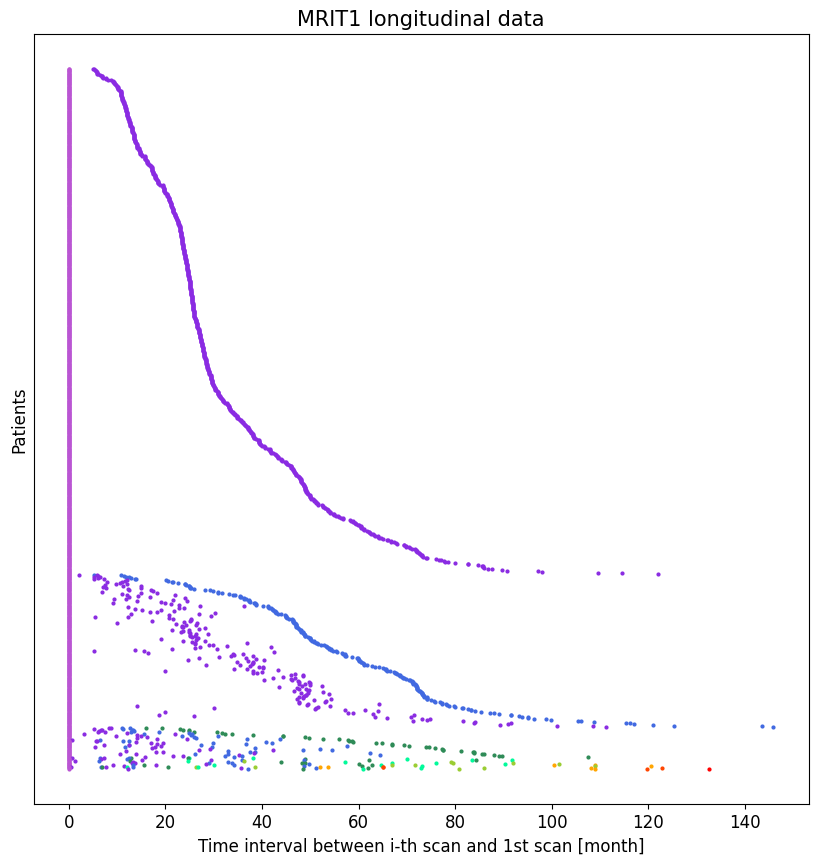

In [50]:
plt.figure(figsize=(10, 10))

for i in range(0, len(y)):

    for j in range(0, len(y[i])):

        plt.scatter(x_data[i][j], y[i][j], color=barve[barve_array[j]], s=4)

plt.title('MRIT1 longitudinal data', fontsize=15)
plt.xlabel('Time interval between i-th scan and 1st scan [month]', fontsize=12)
plt.ylabel('Patients', fontsize=12)
plt.yticks([])

plt.savefig(savePath + 'MRIT1_long_data_interval_matcched_final.png')
plt.show()

## Analyzing data in sorted cohorts 

### Frequency by categories

In [26]:
loadPath = "../../NACC_data/sorted_cohorts/"
savePath = "../results/sorted_cohorts/"

In [27]:
nc_df = pd.read_csv(loadPath + 'nc_v3.csv')
mci_df = pd.read_csv(loadPath + 'mci_v3.csv')
alz_df = pd.read_csv(loadPath + 'alzd_v3.csv')
trans_df = pd.read_csv(loadPath + 'trans_v3.csv')

In [28]:
nc_naccid_counts = nc_df['NACCID'].value_counts()
mci_naccid_counts = mci_df['NACCID'].value_counts()
alz_naccid_counts = alz_df['NACCID'].value_counts()
trans_naccid_counts = trans_df['NACCID'].value_counts()

In [29]:
nc_scan_frequency = nc_naccid_counts.value_counts().sort_index()
mci_scan_frequency = mci_naccid_counts.value_counts().sort_index()
alz_scan_frequency = alz_naccid_counts.value_counts().sort_index()
trans_scan_frequency = trans_naccid_counts.value_counts().sort_index()

In [30]:
combined_naccid_counts = pd.concat([nc_naccid_counts, 
                                    mci_naccid_counts, 
                                    alz_naccid_counts, 
                                    trans_naccid_counts])

combined_scan_frequency = combined_naccid_counts.value_counts().sort_index()

In [31]:
nc_number_of_patients = np.sum(nc_scan_frequency.values)
mci_number_of_patients = np.sum(mci_scan_frequency.values)
alz_number_of_patients = np.sum(alz_scan_frequency.values)
trans_number_of_patients = np.sum(trans_scan_frequency.values)
combined_number_of_patients = np.sum(combined_scan_frequency.values)

In [60]:
print(trans_scan_frequency)
print('Total number of patients with more than one MRIT1 scan =', trans_number_of_patients)

count
2    66
3    32
4     6
5     2
6     4
8     1
Name: count, dtype: int64
Total number of patients with more than one MRIT1 scan = 111


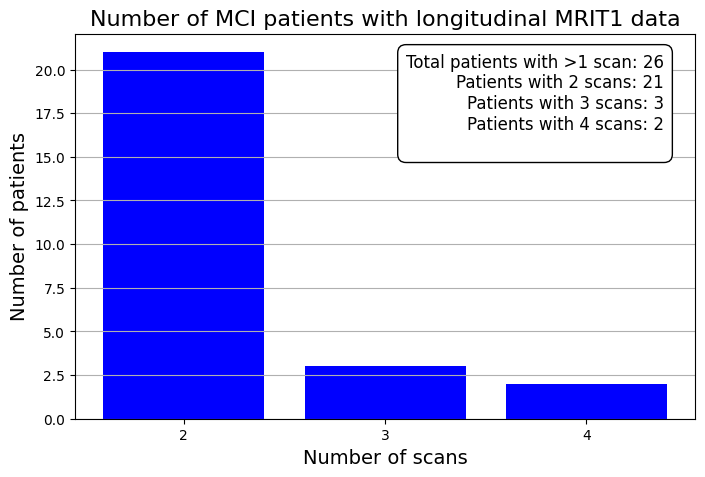

In [68]:
plt.figure(figsize=(8, 5))
plt.bar(mci_scan_frequency.index, mci_scan_frequency.values, color='blue')
plt.title('Number of MCI patients with longitudinal MRIT1 data', fontsize=16)
plt.xlabel('Number of scans', fontsize=14)
plt.ylabel('Number of patients', fontsize=14)
plt.xticks(mci_scan_frequency.index)                                          
plt.grid(axis='y')

textstr = f'Total patients with >1 scan: {mci_number_of_patients}\n'

min_scans = 2
max_scans = mci_scan_frequency.index.max() 

for scans in range(min_scans, max_scans + 1):
    count = mci_scan_frequency.get(scans, 0)
    textstr += f'Patients with {scans} scans: {count}\n'

plt.gca().text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='right',
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=0.5))

#plt.savefig(savePath + 'mci_histogram.png')
plt.show()

### Frequency by uds scores for transition patients

In [71]:
txtPath = "../data/"

In [72]:
with open(txtPath + 'trans_uds_categories.txt', 'r') as f:
    lines = f.readlines()

In [73]:
constant_1_array = [x for x in lines[0].strip().split(',') if x]
constant_2_array = [x for x in lines[1].strip().split(',') if x]
constant_3_array = [x for x in lines[2].strip().split(',') if x]
constant_4_array = [x for x in lines[3].strip().split(',') if x]
change_1_2_array = [x for x in lines[4].strip().split(',') if x]
change_1_3_array = [x for x in lines[5].strip().split(',') if x]
change_1_4_array = [x for x in lines[6].strip().split(',') if x]
change_1_2_3_array = [x for x in lines[7].strip().split(',') if x]
change_1_2_4_array = [x for x in lines[8].strip().split(',') if x]
change_1_3_4_array = [x for x in lines[9].strip().split(',') if x]
change_1_2_3_4_array = [x for x in lines[10].strip().split(',') if x]
change_2_3_array = [x for x in lines[11].strip().split(',') if x]
change_2_4_array = [x for x in lines[12].strip().split(',') if x]
change_2_3_4_array = [x for x in lines[13].strip().split(',') if x]
change_3_4_array = [x for x in lines[14].strip().split(',') if x]

In [75]:
print(constant_3_array)
print(constant_4_array)

['NACC356689', 'NACC389033', 'NACC594813', 'NACC685779']
['NACC665307', 'NACC851285']


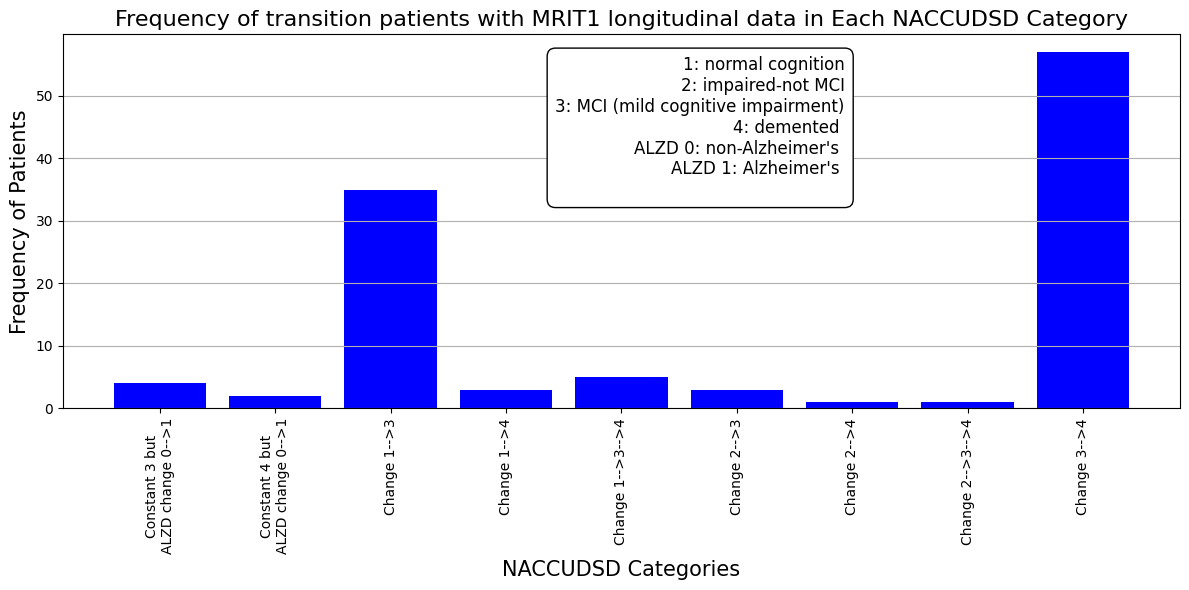

In [84]:
category_lengths = {
    "Constant 3 but\n" 
    "ALZD change 0-->1": len(constant_3_array),
    "Constant 4 but\n" 
    "ALZD change 0-->1": len(constant_4_array),
    "Change 1-->3": len(change_1_3_array),
    "Change 1-->4": len(change_1_4_array),
    "Change 1-->3-->4": len(change_1_3_4_array),
    "Change 2-->3": len(change_2_3_array),
    "Change 2-->4": len(change_2_4_array),
    "Change 2-->3-->4": len(change_2_3_4_array),
    "Change 3-->4": len(change_3_4_array)
}

# Prepare data for histogram
labels = list(category_lengths.keys())
values = list(category_lengths.values())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='blue')
plt.xlabel('NACCUDSD Categories', fontsize=15)
plt.ylabel('Frequency of Patients', fontsize=15)
plt.title('Frequency of transition patients with MRIT1 longitudinal data in Each NACCUDSD Category', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')

textstr = (
    "1: normal cognition\n"
    "2: impaired-not MCI\n"
    "3: MCI (mild cognitive impairment)\n"
    "4: demented \n"
    "ALZD 0: non-Alzheimer's \n"
    "ALZD 1: Alzheimer's \n"
)

plt.gca().text(0.7, 0.75, textstr, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='center', horizontalalignment='right',
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

#plt.savefig(savePath + 'trans_udsd_histogram.png')
plt.show()

### Longitudinal data for each cohort

In [181]:
from dateutil import parser

In [182]:
nc_df = pd.read_csv(loadPath + 'nc_v3.csv')
mci_df = pd.read_csv(loadPath + 'mci_v3.csv')
alz_df = pd.read_csv(loadPath + 'alzd_v3.csv')
trans_df = pd.read_csv(loadPath + 'trans_v3.csv')

combined_df = pd.concat([nc_df, mci_df, alz_df, trans_df], ignore_index=True)

In [183]:
nc_naccid_counts = nc_df['NACCID'].value_counts()
mci_naccid_counts = mci_df['NACCID'].value_counts()
alz_naccid_counts = alz_df['NACCID'].value_counts()
trans_naccid_counts = trans_df['NACCID'].value_counts()

combined_naccid_counts = combined_df['NACCID'].value_counts()

In [184]:
patients = trans_df['NACCID'].unique()

number_of_scans = len(mci_df['NACCID'])

In [185]:
differences = []
sum = 0                                                         # sum to store indexing of the patients (borders for what dates to read)

for i in range(0, len(patients)):                               # one subarray for each unique NACCID (patient)

    naccid = trans_df['NACCID'].unique()[i]                        # unique patients

    num = trans_naccid_counts.loc['{}'.format(naccid)]             # number of MRIT1 scans


    months = np.array(trans_df['MRIMO'][sum : sum + num])
    day = np.array(trans_df['MRIDY'][sum : sum + num])
    years = np.array(trans_df['MRIYR'][sum : sum + num])


    diffs = []


    date1 = np.zeros(num, dtype=object)


    for k in range(0, num):
        
        date1[k] = ('{}-{}-{}'.format(years[k], months[k], day[k]))
        
        date1[k] = parser.parse(date1[k])

        
    for l in range(0, len(date1), 1):
            
        d = np.abs(date1[l] - date1[0])
        

        diffs.append(d.days)

    sum += num

    differences.append(diffs)

In [186]:
for p in differences:

    for e in range(0, len(p)):

        p[e] = p[e] / 30.437                      

In [187]:
dic_unsorted = {}

for i in range(0, len(patients)):    
    
    dic_unsorted['{}'.format(patients[i])] = differences[i] 

In [188]:
sorted_items = sorted(dic_unsorted.items(), key=lambda x: (len(x[1]), x[1][-1]))          #, len(x[1])

dic_sorted = {k: v for k, v in sorted_items}

print(dic_sorted)

{'NACC461456': [0.0, 8.772218024115386], 'NACC425139': [0.0, 9.199329763117259], 'NACC683064': [0.0, 9.265039261425239], 'NACC326999': [0.0, 10.119262739428985], 'NACC287146': [0.0, 10.184972237736964], 'NACC265729': [0.0, 11.236324210664652], 'NACC057402': [0.0, 11.564871702204552], 'NACC226634': [0.0, 12.156257186976378], 'NACC665307': [0.0, 13.109044912442092], 'NACC685779': [0.0, 13.141899661596083], 'NACC483045': [0.0, 13.207609159904063], 'NACC565149': [0.0, 13.404737654828004], 'NACC613244': [0.0, 13.536156651443966], 'NACC463825': [0.0, 13.700430397213916], 'NACC364698': [0.0, 13.897558892137859], 'NACC358181': [0.0, 14.554653875217662], 'NACC120068': [0.0, 14.620363373525642], 'NACC747160': [0.0, 14.718927620987612], 'NACC307886': [0.0, 15.835989092223281], 'NACC175569': [0.0, 16.854486315996976], 'NACC981684': [0.0, 17.248743305844858], 'NACC112837': [0.0, 17.248743305844858], 'NACC192548': [0.0, 17.31445280415284], 'NACC221012': [0.0, 17.938693038078654], 'NACC369503': [0.0,

In [189]:
y = []

m = len(patients)

for keys, values in dic_sorted.items():

    ones = (np.ones_like(values))

    y.append(ones * m)

    m -= 1

print(y)
print(len(y))

[array([111., 111.]), array([110., 110.]), array([109., 109.]), array([108., 108.]), array([107., 107.]), array([106., 106.]), array([105., 105.]), array([104., 104.]), array([103., 103.]), array([102., 102.]), array([101., 101.]), array([100., 100.]), array([99., 99.]), array([98., 98.]), array([97., 97.]), array([96., 96.]), array([95., 95.]), array([94., 94.]), array([93., 93.]), array([92., 92.]), array([91., 91.]), array([90., 90.]), array([89., 89.]), array([88., 88.]), array([87., 87.]), array([86., 86.]), array([85., 85.]), array([84., 84.]), array([83., 83.]), array([82., 82.]), array([81., 81.]), array([80., 80.]), array([79., 79.]), array([78., 78.]), array([77., 77.]), array([76., 76.]), array([75., 75.]), array([74., 74.]), array([73., 73.]), array([72., 72.]), array([71., 71.]), array([70., 70.]), array([69., 69.]), array([68., 68.]), array([67., 67.]), array([66., 66.]), array([65., 65.]), array([64., 64.]), array([63., 63.]), array([62., 62.]), array([61., 61.]), array(

In [190]:
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)

In [191]:
import matplotlib.colors as mcolors
barve = mcolors.CSS4_COLORS

barve_array = ['mediumorchid', 'blueviolet', 'royalblue', 'seagreen', 'mediumspringgreen', 'orange', 'orangered', 'red']

In [192]:
x_data = []

for values in dic_sorted.values():

    x_data.append(values)

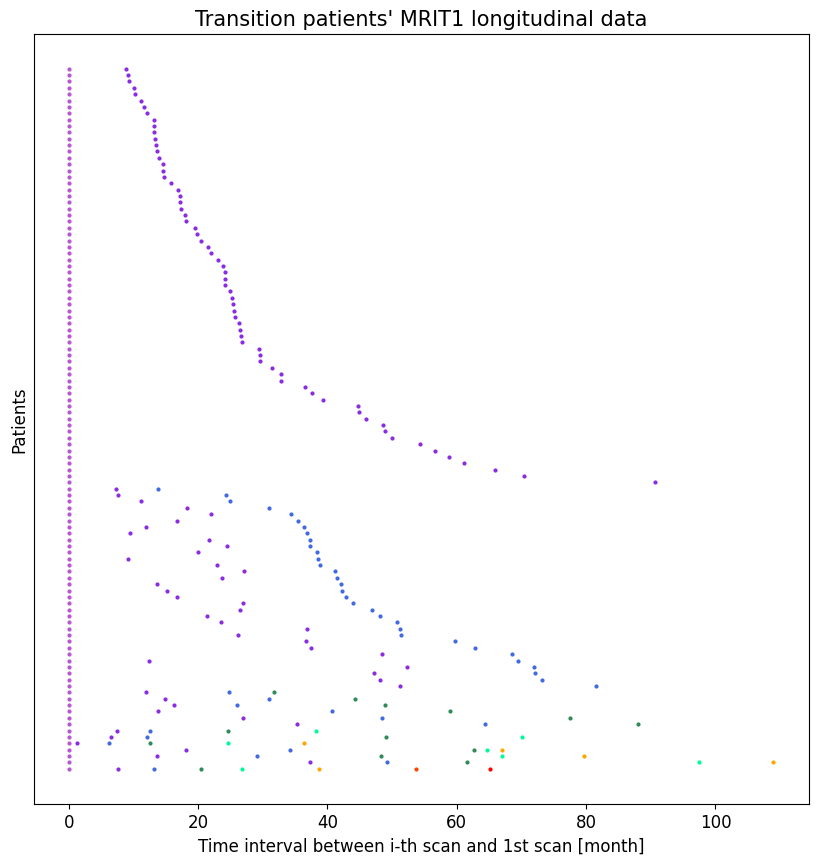

In [193]:
plt.figure(figsize=(10, 10))

for i in range(0, len(y)):

    for j in range(0, len(y[i])):

        plt.scatter(x_data[i][j], y[i][j], color=barve[barve_array[j]], s=4)

plt.title('Transition patients\' MRIT1 longitudinal data', fontsize=15)
plt.xlabel('Time interval between i-th scan and 1st scan [month]', fontsize=12)
plt.ylabel('Patients', fontsize=12)
plt.yticks([])

#plt.savefig(savePath + 'trans_longitudinal.png')
plt.show()